In [1]:
import json
import pickle
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from json_repair import repair_json

from itertools import chain
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

## Utterance Level Confusion Matrix Multi-label

In [2]:
# Load the pickled list
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/comics_ZSL/results/comics35_zs_llama-3-8b-Instruct-bnb-4bit/results.pickle", 'rb') as f:
    
    results = pickle.load(f)

In [3]:
grounds = results['grounds']
predictions = results['predictions']

In [4]:
predictions = [x.split("\nOutput:assistant\n\n")[1] for x in predictions]

In [5]:
bad_idx = []
processed_preds = []

for i,x in enumerate(predictions):
    try:
        y = repair_json(x)
        processed_preds.append(json.loads(y)["list_emotion_classes"])
    except:
        print(i)
        bad_idx.append(i)

597
651
1174
1179
1232
1244
4149
4216
4249
4840
6739
6762
6845
6847
6865
6900
6985
7067


In [6]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]

In [7]:
len(grounds), len(processed_preds)

(7111, 7111)

In [8]:
for idx, (i,j) in enumerate(zip(grounds, processed_preds)):
    
    if len(i) < len(j):

        processed_preds[idx] = processed_preds[idx][:len(i)]

In [9]:
bad_idx = []

for idx, (i,j) in enumerate(zip(grounds, processed_preds)):
    if len(i) != len(j):
        print(idx, len(i), len(j))
        bad_idx.append(idx)

119 3 2
146 2 1
157 2 1
207 2 1
218 2 1
232 3 2
304 3 2
330 3 1
332 3 1
334 3 2
339 3 2
347 3 2
353 3 2
354 3 2
360 3 2
376 2 1
410 3 2
440 3 2
446 3 2
476 3 2
479 3 2
565 3 2
568 3 2
570 3 2
589 2 1
593 2 1
608 2 1
611 3 2
652 3 2
662 2 1
668 3 2
672 3 2
679 2 1
742 2 1
792 2 1
843 2 1
854 2 1
952 3 2
980 2 1
1008 2 1
1054 3 2
1058 3 2
1092 3 2
1093 3 2
1105 2 1
1126 2 1
1135 3 2
1161 3 2
1172 3 2
1173 3 2
1199 3 2
1200 3 2
1221 2 1
1228 3 2
1229 3 2
1238 3 2
1256 2 1
1261 3 2
1290 3 2
1298 3 2
1300 2 1
1305 2 1
1314 2 1
1319 3 2
1328 3 2
1329 2 1
1396 3 2
1398 3 2
1419 3 2
1475 3 2
1643 3 2
1693 3 2
1694 3 2
1695 2 1
1702 2 1
1801 3 2
1825 2 1
1907 2 1
1927 2 1
1931 2 1
1958 2 1
1964 2 1
1972 2 1
1994 2 1
2010 3 2
2012 3 2
2013 2 1
2019 3 2
2024 3 2
2025 3 2
2036 2 1
2080 3 2
2097 3 2
2098 3 2
2198 3 2
2211 4 2
2221 3 2
2228 2 1
2271 3 2
2363 2 1
2423 2 1
2446 2 1
2447 2 1
2503 2 1
2516 2 1
2649 3 2
2654 2 1
2665 3 2
2666 3 2
2667 3 2
2695 3 2
2777 3 2
2778 3 2
2779 3 2
2805 3 2
2834

In [10]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]
processed_preds = [item for i, item in enumerate(processed_preds) if i not in bad_idx]

In [11]:
mlb = MultiLabelBinarizer()

In [12]:
y_true_mhot = mlb.fit_transform(grounds)
y_pred_mhot = mlb.transform(processed_preds)

/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['anticipation', 'apologetic', 'apology', 'compassion', 'concern', 'conviction', 'curiosity', 'desperation', 'determination', 'frustration', 'gratitude', 'guilt', 'helpfulness', 'hope', 'love', 'pleading', 'relief', 'suspicion', 'trust', 'urgency', 'warmth'] will be ignored
  warnings.warn(


In [13]:
print(classification_report(y_true_mhot, y_pred_mhot, target_names=mlb.classes_, digits=3))

              precision    recall  f1-score   support

       anger      0.401     0.850     0.545      2157
     disgust      0.206     0.507     0.293       282
        fear      0.490     0.327     0.392      1502
         joy      0.622     0.278     0.384      1622
     neutral      0.109     0.037     0.055       437
     sadness      0.641     0.245     0.354      1634
    surprise      0.563     0.492     0.525      1632

   micro avg      0.450     0.446     0.448      9266
   macro avg      0.433     0.391     0.364      9266
weighted avg      0.505     0.446     0.424      9266
 samples avg      0.423     0.421     0.422      9266



/Utilisateurs/umushtaq/.conda/envs/triton_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
cm_g = [item for sublist in grounds for item in sublist]
cm_p = [item for sublist in processed_preds for item in sublist]

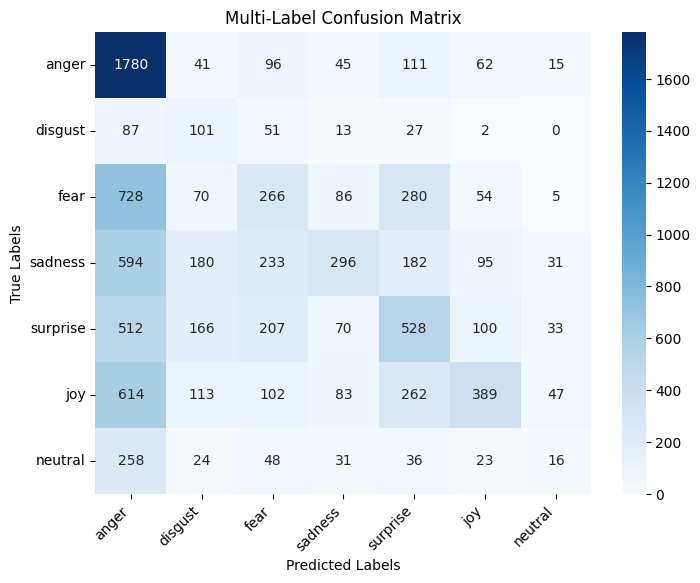

In [17]:
all_labels = ["anger", "disgust", "fear", "sadness", "surprise", "joy", "neutral"]

cm = confusion_matrix(cm_g, cm_p, labels=all_labels)

#cm = confusion_matrix(grounds, processed_preds, labels=all_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Multi-Label Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

## Page level confusion matrix

In [18]:
# Load the pickled list
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/comics_FT/saved_models/comics35_pg_llama-3-8b-Instruct-bnb-4bit/comics35_results_3.pickle", 'rb') as f:
    
    results = pickle.load(f)

In [19]:
grounds = results['grounds']
predictions = results['predictions']

In [20]:
grounds = [json.loads(x)["page_utterance_emotions"] for x in grounds]
predictions = [json.loads(x)["page_utterance_emotions"] for x in predictions]

In [21]:
bad_idx = []

for idx, (i,j) in enumerate(zip(grounds, predictions)):
    if len(i) != len(j):
        print(idx, len(i), len(j))
        bad_idx.append(idx)

5 20 19
6 15 14
14 23 21
36 17 16
84 15 14
103 13 12
121 19 20


In [22]:
grounds = [item for i, item in enumerate(grounds) if i not in bad_idx]
predictions = [item for i, item in enumerate(predictions) if i not in bad_idx]

In [23]:
len(grounds), len(predictions)

(149, 149)

In [26]:
grounds = [item for sublist in grounds for item in sublist]
predictions = [item for sublist in predictions for item in sublist]

In [27]:
mlb = MultiLabelBinarizer()

In [28]:
y_true_mhot = mlb.fit_transform(grounds)
y_pred_mhot = mlb.transform(predictions)

In [40]:
y_true_mhot.shape, y_pred_mhot.shape

((1204, 7), (1204, 7))

In [41]:
print(classification_report(y_true_mhot, y_pred_mhot, target_names=mlb.classes_, digits=3))

              precision    recall  f1-score   support

       anger      0.607     0.553     0.579       416
     disgust      0.206     0.171     0.187        41
        fear      0.485     0.421     0.451       278
         joy      0.598     0.543     0.569       276
     neutral      0.644     0.422     0.510        90
     sadness      0.527     0.645     0.580       301
    surprise      0.627     0.576     0.600       330

   micro avg      0.566     0.535     0.550      1732
   macro avg      0.528     0.476     0.497      1732
weighted avg      0.568     0.535     0.548      1732
 samples avg      0.594     0.559     0.549      1732



In [43]:
len(grounds), len(predictions)

(1204, 1204)

In [44]:
grounds_e = []
preds_e = []

for grd, prd in zip(grounds, predictions):
    if len(grd) == len(prd):
        grounds_e.append(grd)
        preds_e.append(prd)

In [45]:
len(grounds_e), len(preds_e)

(718, 718)

In [46]:
cm_g_pg = [item for sublist in grounds_e for item in sublist]
cm_p_pg = [item for sublist in preds_e for item in sublist]

In [47]:
len(cm_g_pg), len(cm_p_pg)

(897, 897)

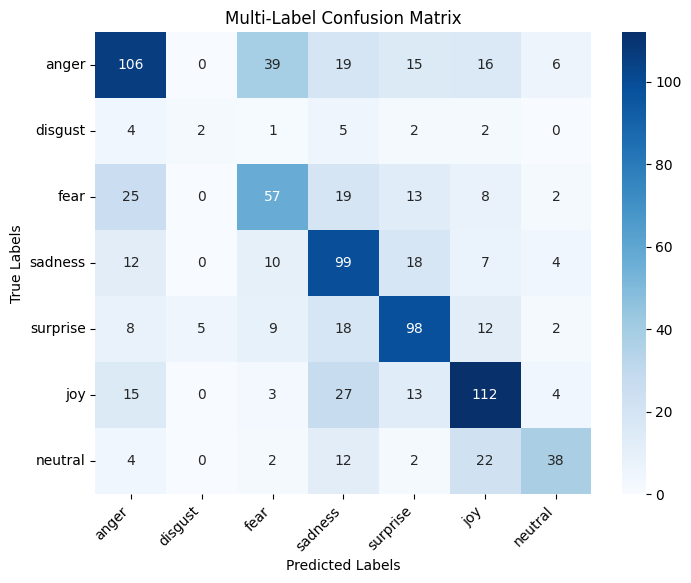

In [48]:
all_labels = ["anger", "disgust", "fear", "sadness", "surprise", "joy", "neutral"]

cm = confusion_matrix(cm_g_pg, cm_p_pg, labels=all_labels)

#cm = confusion_matrix(grounds, processed_preds, labels=all_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Multi-Label Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()